# Prosjekt i Modellering: Oppgave 1
### Erlend og Stian

#### Hensikt 

Hensikten med oppgaven er at vi skal undersøke og modellere hvordan to populasjoner samspiller og utvikler seg. Vi skal legge til flere begrensninger i modellen, gjøre rede for hva de er, og skal deretter drøfte hva disse har for populasjonen å si.

##### Problemstilling
Verden har kommet i en post-apolyptisk era. Zombier er på villfot, og en gruppe på 500 personer har stifet samfunnet Alexandria. Viruset som gjør mennesker om til zombier, smitter kun via blod, som kloring eller biting fra en zombie. Alexandria er trygge for nå, men etter hvert er de nødt til å bevege seg ut i villmarken på jakt etter nye ressurser og hjelpe andre mennesker i nød. Så de vil aldri føle seg helt trygge. 

### Deloppgave 1

In [1]:
# importerer biblioteker vi trenger
from pylab import *   

In [2]:
# konstanter - lager alle vi trenger for hele programmet. Noen definerer vi på nytt i egne celler.
# tid
tid = 10      # tid i år
N = 100000    # Antall ganger løkken skal kjøre
dt = tid/N    # dt/tidssteg

# fruktbarhet og død
ft = 2          # barn per menneske
la = 50         # gjennomsnittlig levealder
fk = (ft/la)/2  # fruktbarhetskonstant
ik = 0.46       # innvandringskonstant
death = 1/la + 0.0005    # naturlig død hos mennesker
zk = 0.02         # justeringskonstant for nedgang av zombier

# bæreevner
b_m = 1500      # bæreevne mennesker
b = 300         # bæreevne innvandrere per år

# møtekonstanter
meet1 = 0.00004   # møtekonstant mellom menneske/zombie
meet2 = 0.000029  # møtekonstant 2 mellom menneske/zombie
zki = 0.01        # møtekonstant mellom innvandrere og zombier

#andre 
tol = 10e-4       # toleranse for et nullpunkt
g = 1             # variabel som styrer forsterkninger

#matriser
I = zeros(N)    # innvandrere
M = zeros(N)    # mennesker
t = zeros(N)    # tid
Z = zeros(N)    # zombier

#Initialbetingelser
I[0] = 40       # 40 innvandrere i starten
M[0] = 500      # 500 mennesker i starten
Z[0] = 50       # 50 zombier i starten

Text(0,0.5,'Antall mennesker')

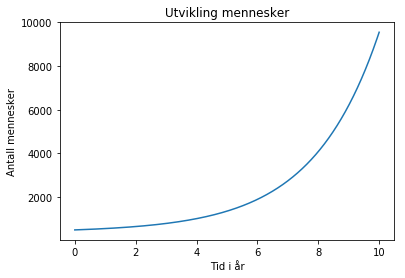

In [3]:
def mder(m, i):     # vekstfarten til mennesker
    return fk*m+i

def ider(i, m):     # vekstfarten til innvandrere
    return ik*i

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i],M[i])*dt 
    M[i+1] = M[i] + mder(M[i], I[i])*dt
    t[i+1] = t[i] + dt

# plotting
plot(t, M)
title('Utvikling mennesker')
xlabel('Tid i år')
ylabel('Antall mennesker')

I dette programmet er menneskene trygge mot zombier. Det kommer mennesker til gjennom fødsel og innvandring, men det er ingenting som begrenser veksten. Vi ser da at menneskepopulasjonen skyter oppover og har økt med 2000% i løpet av 10 år.

For å regne ut befolkningen lagde vi et uttrykk for veksten ved fødsel og innvandring, som da blir den deriverte av befolkningsantallet. Vi brukte så Eulers metode for å regne ut populasjonen ved hvert tidssteg, og vi vil bruke den for alle de andre programmene. Eulers metode er en metode for å løse differensiallikninger numerisk. Den går ut på å regne ut neste funksjonsverdi ved å ta og legge til den deriverte til forrige funksjonsverdi, f(x+1)=f(x)+f’(x). Hvis man regner ut mange nok verdier får man en tilsynelatende kontinuerlig graf.

### Deloppgave 2

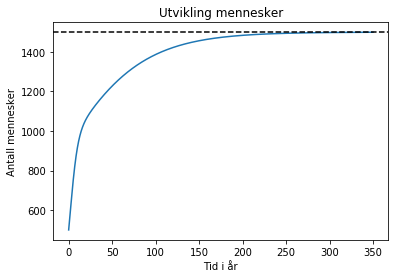

In [4]:
tid = 350      # tid i år
dt = tid/N     # dt/tidssteg

def mder(m, i):               # vekstfarten til menneskene, nå med bæreevne
    return fk*m*(1-(m/b_m)) + i

def ider(i, m):               # vekstfarten til innvandrene, nå med bæreevne
    return ik*i*(1-(i/b)) - i*m/b_m

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i],M[i])*dt 
    M[i+1] = M[i] + mder(M[i], I[i])*dt
    t[i+1] = t[i] + dt

# plotting
plot(t, M)
title('Utvikling mennesker')
xlabel('Tid i år')
ylabel('Antall mennesker')
axhline(y=1500,color = 'black', linestyle='dashed')

I denne utgaven av programmet har vi lagt til en bæreevne for antallet mennesker. Det er urealistisk at populasjonen bare kan vokse og vokse i det uendelige og vi måtte derfor sette en grense. Vi valgte 1500. 
Dette gjøres ved å gange utrykket for den deriverte med 1-populasjon/bæreevne. Dette utrykket går mot 0 når populasjonen går mot bæreevnen. Populasjon/bæreevne blir da 1 og siden 1-1=0 blir veksten 0. Utrykket blir negativt hvis populasjonen overstiger bæreevnen. Populasjon/bæreevne blir da >1 og 1 – k der k> 1 gir en negativ faktor. Siden 1-populasjon/bæreevne blir gradvis lavere når man nærmer seg bæreevnen avtar veksten jevnt og man får en fin avbøyning mot bæreevnen.

Vi satt også en grense for hvor mange innvandrere det kan komme per år da det ikke er uendelig med mennesker rundt som har lyst til å sloss gjennom en zombiehorde (ikke at den er lagt til enda) for å komme til et heller tvilsomt samfunn med en levealder=50 år. Det kan også tenkes at befolkningen er redd nykommere. Vi satt grensen ved 300 innvandrere per år. Vi trakk også fra i*m/b_m for å justere ned innvandringen ved bæreevnen til antall mennesker. Hvis ikke førte innvandringen til at populasjonen holdt seg over bæreevnen og at den naturlige veksten ble negativ. Vi fant det usannsynlig at folk ville heller sulte over bæreevnen for å ta inn så mange migranter som mulig.

### Deloppgave 3

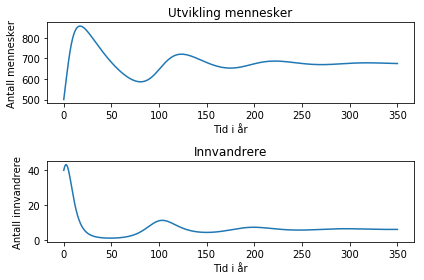

In [5]:
def mder(m, i):      # vekstfart mennesker, med naturlig død og bæreevne
    return fk*m*(1-(m/b_m)) + i - death * m 

def ider(i, m):     # vekstfarten til innvandrere
    return ik*i*(1-(i/b)) - i*m/b_m  

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i], M[i])*dt
    M[i+1] = M[i] + mder(M[i], I[i])*dt
    t[i+1] = t[i] + dt
    
# plotting
subplot(2,1,1)
plot(t, M)
title('Utvikling mennesker')
xlabel('Tid i år')
ylabel('Antall mennesker')

subplot(2,1,2)
plot(t,I)
title('Innvandrere')
xlabel('Tid i år')
ylabel('Antall innvandrere')
tight_layout()

Her har vi lagt til naturlig død. I det forrige programmet vokste populasjonen opp til bæreevnen og ble værende der, mens folk levde uendelig lenge. Her har vi lagt til at hvert individ har en 1/50 sjanse for å dø hvert år, altså at levealderen er 50 år. Siden veksten ved innvandring blant annet er avhengig av veksten ved forrige tids steg bruker den litt tid på å reagere på andre endringer. Dette gjør at befolkningen kan vokse litt over og så synke litt under den nye bæreevnen og det tar litt tid før populasjonen stabiliserer seg. I praksis kunne dette betyd at det tar litt tid før mulige migranter får med seg at det er dårlige tider og at folk dør og det tar derfor litt tid før befolkningen stabiliserer seg.

### Deloppgave 4

In [6]:
# Vi introduserer zombier, og er avhengig av et plott som plotter zombier og mennesker sammen
def plotting(t, M, Z):
    fig = figure()
    ax = fig.add_subplot(111)
    data1 = ax.plot(t, M, '-b', label = 'Mennesker')
    ax2 = ax.twinx()
    data2 = ax2.plot(t, Z, '-g', label = 'Zombier')

    data = data1 + data2
    datatittel = [l.get_label() for l in data]
    ax.legend(data, datatittel, loc=0)

    ax.grid()
    ax.set_xlabel('Tid i år')
    ax.set_ylabel('Antall mennesker')
    ax2.set_ylabel('Antall Zombier')
    plt.show()

Vi definerer dette som en funksjon, slik at vi slipper å skrive inn dette for hver gang. På venstre y-akse vil man finne antall mennesker som funksjon av tiden. På høyre y-akse vil man finne antall zombier som funksjon av tiden, bare at utvikling starer på venstre side (som en vanlig graf). Merk at koden er hentet fra boka. Under har vi lagd en funksjon som plotter antall innvandrere som kommer hvert år.

In [7]:
# funksjon for plotting av innvandrere
def plotinnv(t, I):
    plot(t,I)
    title('Innvandrere')
    xlabel('Tid i år')
    ylabel('Antall innvandrere')

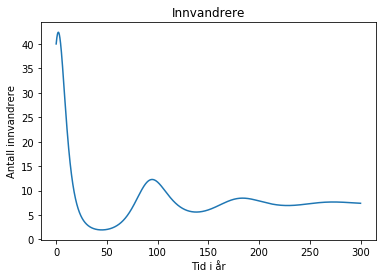

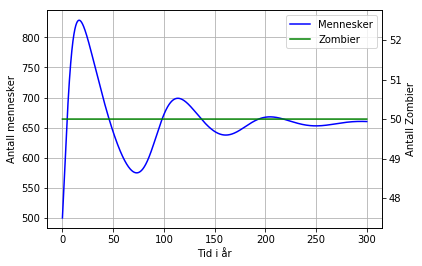

In [8]:
# endrer tiden
tid = 300      # tid i år
dt = tid/N     # dt/tidssteg

def mder(m, z, i):     # vekstfart mennesker
    return fk*m*(1-(m/b_m)) + i - death * m - meet1*m*z

def ider(i, m,z):      # vekstfart innvandrere
    return ik*i*(1-(i/b))-i*m/b_m - i*zki

def zder(z, m, i):     # vekstfart zombier
    return 0

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i],M[i], Z[i])*dt   
    M[i+1] = M[i] + mder(M[i], Z[i], I[i])*dt
    Z[i+1] = Z[i] + zder(Z[i], M[i], I[i])*dt

    t[i+1] = t[i] + dt

# plotting
plotinnv(t,I)    
plotting(t,M,Z)

I denne modellen vil ikke zombiene vokse. Siden menneskene ikke vet hvordan man slår tilbake mot zombiene, samt at zombiene allerede er "døde", vil ikke populasjonen utvikle seg noe. Vekstfarten til zombiene er derfor 0 til enhver tid. Menneskene derimot kan bli drept av zombier, og vi må innføre et nytt negativt ledd, som minsker veksten. "meet1" sier noe om hvor sannsynlig eller hvor ofte mennesker blir drept av zombier. $meet1*m*z$ avhenger både av antall zombier og mennesker. Det vil si at dersom det er mange mennesker, vil flere bli drept. Men samtidig, avhenger den også på antall zombier, så hvis det ikke er så mange zombier, vil heller ikke like mange bli drept. Innvandrere på vei inn til befestningen kan også møte på, og bli drept av zombiene. Vi innfører derfor et nytt ledd her også. $i*zki$ avhenger kun av innvandrerne, og ikke på zombiene. Dette er fordi vi tenker at det i denne modellen er en bestemt sannsynlighet for at innvandrere blir drept. Dette kan ha med at de for eksempel går mindre trygge ruter osv. "zki" er en konstant som bestemmer denne sannsynligheten.

Hvis vi ser på grafen ser vi at menneskene stiger raskt i starten. Etter ca 20 år når de et toppunkt. Sammenhengen med at de vokser så raskt, er fordi det er et høyt antall innvandrere i starten, som vi ser i grafen for innvandrere. Dette faller sterkt, sammen med menneskepopulasjonen. Man skulle kanskje trodd at menneskene ville dødd ut hvis zombiene ikke døde, men slik er det ikke. Det er mest fordi innvandrerne gir en god tilførsel av nye mennesker, samtidig som det ikke er nok zombier til å utrydde menneskene ($meet1*m*z$). Vekstfarten til menneskene går da mot 0. Etter ca 300 år ser vi at menneskenes populasjon vil stabilisere seg ved rundt 650 mennesker. Det er da en "likevekt" mellom mennesker som dør og mennesker som kommer fra fødsel/innvandring. 

### Deloppgave 5

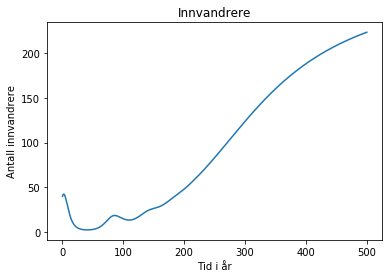

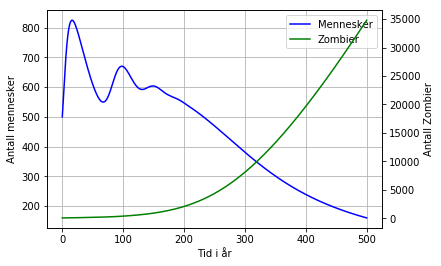

In [9]:
# endrer tid
tid = 500      # tid i år
dt = tid/N     # dt/tidssteg

def mder(m, z, i):     # vekstfart mennesker
    return fk*m*(1-(m/b_m)) + i - death * m - meet1*m*z 

def ider(i, m,z):      # vekstfart innvandrere
    return ik*i*(1-(i/b))-i*m/b_m - i*zki

def zder(z, m, i):     # vekstfart zombier
    return meet2*z*m + i*(zki-0.005)

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i],M[i], Z[i])*dt
    
    M[i+1] = M[i] + mder(M[i], Z[i], I[i])*dt
    Z[i+1] = Z[i] + zder(Z[i], M[i], I[i])*dt
    
    t[i+1] = t[i] + dt
    
# plotting
plotinnv(t,I)
plotting(t,M,Z)

Det eneste vi endrer på i dette programmet er vekstfarten til zombiene. I modellen legger vi til muligheten at mennesker (og innvandrere som ikke har blitt en del av Alexandria) kan bli til zombier dersom de ikke blir revet i fillebiter. Vi innfører derfor 2 nye positive ledd i funksjonen for vekstfarten til zombiene. "meet2" gir hvor ofte zombiene dreper mennesker, hvor de ikke river dem i filler, slik at menneskene blir til zombier. meet2 skal være mindre enn meet1, siden meet1 gir møte mellom zombie og menneske, uavhengig om de blir revet i filler eller ikke. Det hadde ikke gitt mening om meet2 hadde vært større enn meet1, fordi da hadde flere mennesker blitt til zombier enn det antallet mennesker som faktisk dør. "zki" er igjen møtekonstanten mellom innvandrerne og zombiene, og avhenger kun av innvandrerne. Vi tok $i*(zki-0.005)$ fordi ikke alle innvandrerne de dreper blir til zombier. $meet2*z*m$ avhenger på samme måte som $meet1*z*m$ av antall zombier og mennesker, og det er samme begrunnelse for hvorfor det er slik. Flere mennesker vil føre til at flere blir drept og gjort til zombier, samtidig som at dersom det er mange av en populasjon og liten av den andre, vil det føre til at produktet ikke blir så høyt allikavel.  

Ser vi på grafen øker menneskene raskt i starten, på grunn av den høye innvandringen. Samtidig ser vi at zombiepopulasjonen vokser eksponentielt. Grunnen til at de øker så mye, og vil fortsette å øke, er fordi når populasjonen av mennesker blir mindre, vil det føre til flere innvandrere. Siden zombiene ikke dør, blir $meet2*z*m$ veldig stor, siden z blir større og større. Vi ser på grafen til innvandrerne at den øker og øker helt til den begynner å nærme seg bæreevnen. Dette gjør det mulig for zombiene å vokse mye. Hadde innvandrerne ikke hatt en så stor vekst, ville menneskepopulasjonen ganske fort blitt null, og veksten til zombiene hadde stoppet opp. Grunnen til innvandrerne vokser så mye, er fordi det negative leddet $i*m/b_m$ vil bli liten når vi får færre mennesker (vi ønsker jo at det skal komme flere innvandrere når det er få mennesker). Vi ser allerede her at menneskepopulasjonen begynner å nærme seg null, noe som kan bety at over en lengre periode enn 500 år, ville menneskene dødd ut. 

### Deloppgave 6

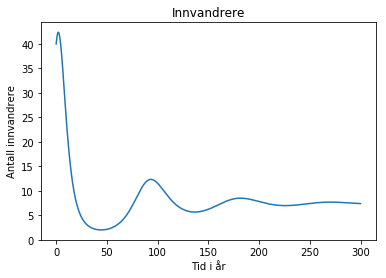

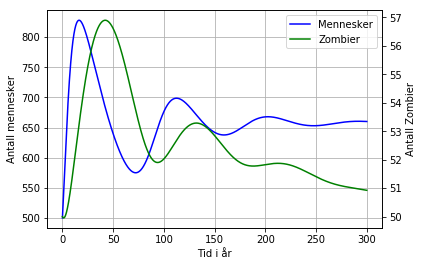

In [10]:
# endrer tid
tid = 300      # tid i år
dt = tid/N     # dt/tidssteg


def mder(m, z, i):    # vekstfart mennesker
    return fk*m*(1-(m/b_m)) + i - death * m - meet1*m*z 

def ider(i, m,z):     # vekstfart innvandrere
    return ik*i*(1-(i/b))-i*m/b_m - i*zki

def zder(z, m, i):    # vekstfart zombier
    return meet2*z*m + i*(zki-0.005) - zk*z

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i],M[i], Z[i])*dt
    
    M[i+1] = M[i] + mder(M[i], Z[i], I[i])*dt
    Z[i+1] = Z[i] + zder(Z[i], M[i], I[i])*dt
    
    t[i+1] = t[i] + dt

# plotting
plotinnv(t,I)
plotting(t,M,Z)

Mennesker kan i dette programmet drepe zombier, og vi trenger et nytt negativt ledd for vekstfarten av zombiene. "zk" er en konstant som bestemmer hvor ofte mennesker dreper zombiene. Hva produktet blir, avhenger av antall zombier. Den avhenger ikke av mennesker, fordi vi tenker at menneskene vil drepe zombier avhengig av hvor mange zombier det er der, ikke hvor mange mennesker det er (siden de ikke unødig ønsker å risikere seg selv). Dersom det er mange zombier, ønsker menneskene å drepe zombiene så de ikke vokser for mye. Når det er få zombier ønsker de ikke å unødvendig risikere livet for å drepe zombier. 

Vi vender nå blikket mot grafen. Vi får noe som minner om en dempet syklisk svingning, men vi ser at zombiepopulasjonen så vidt varierer. Det dette betyr at det i realiteten er veldig vanskelig å oppnå sykliske svingninger, og at det er veldig sjeldent at det oppstår (siden det er veldig mange faktorer som spiller en rolle). Vi oppnår til slutt en viss balanse mellom zombiene og menneskene. Da går vekstfarten mot 0, som betyr at antall mennesker som dør pluss de drepte er like mange som blir født eller innvandrer til samfunnet. Zombiene oppnåer også en viss balanse, bare at her blir det litt flere drepte enn det blir nye. Det negative leddet blir "størst", og vekstfarten blir negativ. Hvis utvikling fortsetter som i grafen, kan vi anta at zombiene vil dø ut etter en veldig lang periode.

### Deloppgave 7

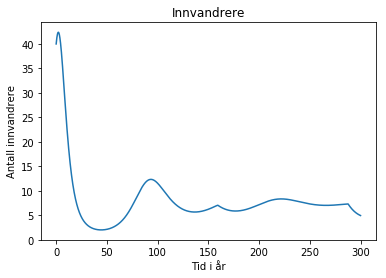

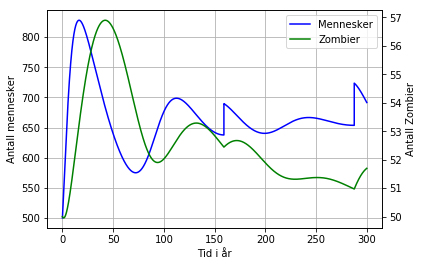

In [12]:
def mder(m, z, i):     # vekstfart mennesker
    return fk*m*(1-(m/b_m)) + i - death * m - meet1*m*z 

def ider(i, m,z):      # vekstfart innvandrere
    return ik*i*(1-(i/b))-i*m/b_m - i*zki

def zder(z, m, i):     # vekstfart zombier
    return meet2*z*m + i*(zki-0.005) - zk*z 

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i],M[i], Z[i])*dt
    M[i+1] = M[i] + mder(M[i], Z[i], I[i])*dt
    Z[i+1] = Z[i] + zder(Z[i], M[i], I[i])*dt
    t[i+1] = t[i] + dt

# en spesiell måte å legge til forsterkninger, som går på sannsynlighet
    f = randint(1,4) # 1/3 sjansje 
    if (abs(mder(M[i], Z[i], I[i])) <= tol) and g==1:
        if mder(M[i-10], Z[i-10], I[i-10]) < mder(M[i], Z[i], I[i]): 
            if f == 1:
                M[i+1] = M[i+1] + randint(50,100)
            else:
                g=0      
    if (abs(mder(M[i], Z[i], I[i])) <= tol):
        if mder(M[i-10], Z[i-10], I[i-10]) > mder(M[i], Z[i], I[i]):
            g=1

# plotting
plotinnv(t,I)            
plotting(t,M,Z)

I denne modellen kan menneskene få forsterkninger fra nabobyer. Hvor mange som immigrerer er et forskjellig tall hver gang mellom 50 og 100. Programmet med vekstfartene og eulers metode er den samme som i forrige oppgave, bortsett fra vi nå har lagt til et program som bestemmer om de skal få forsterkninger, basert på sannsynlighet. 

Vi lager et tilfeldig tall, f, mellom 1 og 4 (1,2,3). Det tilsvarer en 1/3 sjanse. Vi sjekker deretter absoluttverdien for vekstfarten til menneskene, og om den er mindre enn toleransen, altså når vekstfarten er lik 0. Vi sjekker også om g=1 (kommer tilbake til det). Vi ønsker at det skal være en 1/3 sjanse for at forsterkninger kommer når vi er på et bunnpunkt for mennesker. Vi har nå sjekket at vekstfarten er 0, og vi må deretter sjekke om det er et bunn- eller toppunkt. Vi sjekker da om vekstfarten var mindre (mer negativ) for 10 tidssteg siden. Hvis den er det, har vi et bunnpunkt. Da legger vi til forsterkninger dersom f=1, altså det er en 1/3 sjanse for hvert bunnpunkt for å få forsterkninger, siden f varier for hver gang. Hvis vekstfarten ikke er mindre setter vi variablen g = 0. Dette er fordi vi kun ønsker å sjekke kun en gang for hvert bunnpunkt. Det kan hende at det er flere tidssteg på rad som oppfyller det første kravet. Da blir det nesten garantert at det kommer forsterkninger, noe vi ikke ønsker. Når g=0 oppfylles ikke det første kravet, og bunnpunktet hoppes over. Men vi ønsker å sjekke for neste bunnpunkt også. Da må g=1 igjen. Dette gjør vi ved å sette g=1 ved toppunktet. Vi sjekker om absoluttverdien er mindre enn toleransen. Hvis det stemmer, sjekker vi om vekstfarten for 10 tidssteg siden var større enn vekstfarten nå. Hvis den er det, vet vi at vi har et toppunkt, og vi kan sette g=1.

Så ser vi på grafen. Ved noen bunnpunkter vil Alexandria få forsterkninger, og dette skaper noen hopp i grafen, og det blir som at vi hopper til toppunktet med en gang. Vekstfarten vil med en gang bli negativ etter at forsterkningene har kommet (flere som kan dø og bli drept, ergo: $death*m$ og $meet1*z*m$ blir mer negative). Utenom hoppene som forekommer ca hvert 150 år, blir grafene relativt sykliske med demping. Zombiepopulasjonen får også et plutselig hopp når forsterkningene kommer. Dette fordi det kommer flere mennesker som kan bli til zombier. $meet2*z*m$ vil øke betraktelig, og øker vekstfarten. 

### Andre modeller

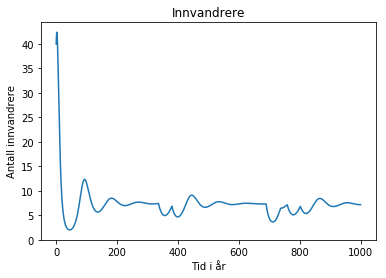

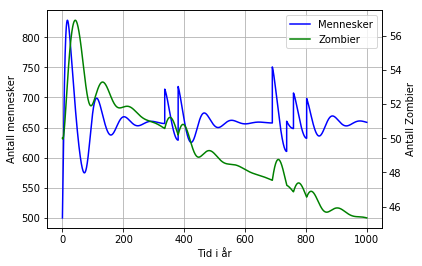

In [13]:
tid = 1000      # tid i år
dt = tid/N     # dt/tidssteg

def mder(m, z, i):     # vekstfart mennesker
    return fk*m*(1-(m/b_m)) + i - death * m - meet1*m*z 

def ider(i, m,z):      # vekstfart innvandrere
    return ik*i*(1-(i/b))-i*m/b_m - i*zki

def zder(z, m, i):     # vekstfart zombier
    return meet2*z*m + i*(zki-0.005) - zk*z 

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i],M[i], Z[i])*dt
    M[i+1] = M[i] + mder(M[i], Z[i], I[i])*dt
    Z[i+1] = Z[i] + zder(Z[i], M[i], I[i])*dt
    t[i+1] = t[i] + dt

# en spesiell måte å legge til forsterkninger, som går på sannsynlighet
    f = randint(1,3) # 1/3 sjansje 
    if (abs(mder(M[i], Z[i], I[i])) <= tol) and g==1:
        if mder(M[i-10], Z[i-10], I[i-10]) < mder(M[i], Z[i], I[i]): 
            if f == 1:
                M[i+1] = M[i+1] + randint(50,100)
            else:
                g=0      
    if (abs(mder(M[i], Z[i], I[i])) <= tol):
        if mder(M[i-10], Z[i-10], I[i-10]) > mder(M[i], Z[i], I[i]):
            g=1
            
plotinnv(t,I)            
plotting(t,M,Z)

Modellen viser hvordan det vil se ut de neste 1000 årene. Forsterkningene er med på holde igang svingningene i populasjonene. Zombiene synker veldig lite, som tyder på at det er en balanse.

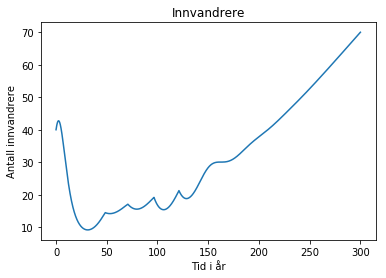

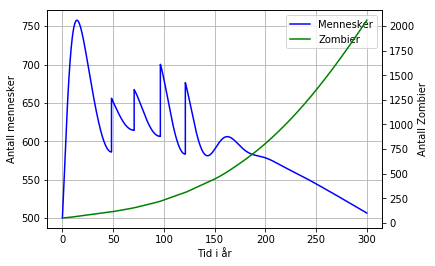

In [16]:
# endrer konstanter
tid = 300         # tid i år
dt = tid/N        # dt/tidssteg
meet1 = 0.00006   # møtekonstant mellom menneske/zombie
meet2 = 0.00005   # møtekonstant 2 mellom menneske/zombie
zk = 0.018        # justeringskonstant for nedgang av zombier
la = 30           # levealdre
ft = 2            # barn per menneske 
fk = (ft/la)/2    # fruktbarhetskonstant
death = 1/la + 0.005    # naturlig død hos mennesker

def mder(m, z, i):     # vekstfart mennesker
    return fk*m*(1-(m/b_m)) + i - death * m - meet1*m*z 

def ider(i, m,z):      # vekstfart innvandrere
    return ik*i*(1-(i/b))-i*m/b_m - i*zki

def zder(z, m, i):     # vekstfart zombier
    return meet2*z*m + i*(zki-0.005) - zk*z 

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i],M[i], Z[i])*dt
    M[i+1] = M[i] + mder(M[i], Z[i], I[i])*dt
    Z[i+1] = Z[i] + zder(Z[i], M[i], I[i])*dt
    t[i+1] = t[i] + dt

# en spesiell måte å legge til forsterkninger, som går på sannsynlighet
    f = randint(1,3) # 1/3 sjansje 
    if (abs(mder(M[i], Z[i], I[i])) <= tol) and g==1:
        if mder(M[i-10], Z[i-10], I[i-10]) < mder(M[i], Z[i], I[i]): 
            if f == 1:
                M[i+1] = M[i+1] + randint(50,100)
            else:
                g=0      
    if (abs(mder(M[i], Z[i], I[i])) <= tol):
        if mder(M[i-10], Z[i-10], I[i-10]) > mder(M[i], Z[i], I[i]):
            g=1
            
plotinnv(t,I)            
plotting(t,M,Z)

Grafen viser kanskje en utvikling som er mer realtistisk, hvor det i slutten vil bli for mange zombier, og menneskene vil til slutt dø ut. Vi har justert ned levealderen, siden det virker ikke så veldig sannsynlig å leve lenger enn 30 år. Vi har også økt begge møtekonstantene mellom zombie og menneskene. Så zombiene er med andre ord mer effektive til å drepe. I tillegg har vi minsket sannsynligheten for at mennesker dreper zombier, og økt den naturlige døden hos mennesker. Alt dette, spesielt møtekonstantene gjør at vekstfarten til zombiene øker betraktelig. Menneskene blir veldig avhengig av forsterkninger, men den hjelpen forsvinner etter hvert. Det kan være mange grunner til det. Den rent matematiske er at det ikke kommer et bunnpunkt hos menneskene. Det er nærmest lineær minkning. Siden vi har designet programmet til å bare gi forsterkninger ved et bunnpunkt, vil ikke forsterkninger kommer før vekstfarten er 0 (med andre ord, når Alexandria har dødd ut!). Den praktiske tolkningen kan være at de ikke har råd til å gi flere forsterkninger, eller ser at Alexandria er dømt til å dø ut, og sparer heller sine egne. Antall innvandrere øker mye, før å prøve å balansere ut zombiene, men vekstfarten til zombiene er altfor stor for det.

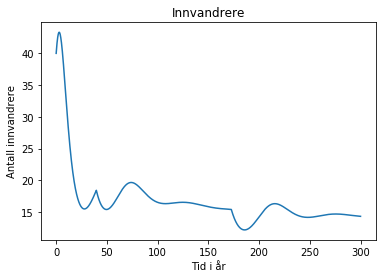

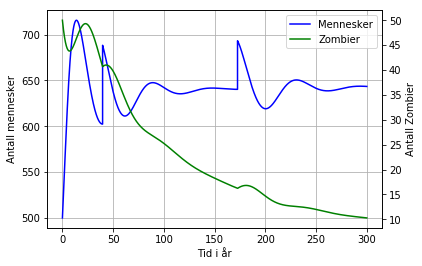

In [17]:
tid = 300         # tid i år
dt = tid/N        # dt/tidssteg
meet1 = 0.0003   # møtekonstant mellom menneske/zombie
meet2 = 0.00025   # møtekonstant 2 mellom menneske/zombie
zk = 0.17        # justeringskonstant for nedgang av zombier

def mder(m, z, i):     # vekstfart mennesker
    return fk*m*(1-(m/b_m)) + i - death * m - meet1*m*z 

def ider(i, m,z):      # vekstfart innvandrere
    return ik*i*(1-(i/b))-i*m/b_m - i*zki

def zder(z, m, i):     # vekstfart zombier
    return meet2*z*m + i*(zki-0.005) - zk*z 

# Eulers metode
for i in range(N-1):
    I[i+1] = I[i] + ider(I[i],M[i], Z[i])*dt
    M[i+1] = M[i] + mder(M[i], Z[i], I[i])*dt
    Z[i+1] = Z[i] + zder(Z[i], M[i], I[i])*dt
    t[i+1] = t[i] + dt

# en spesiell måte å legge til forsterkninger, som går på sannsynlighet
    f = randint(1,3) # 1/3 sjansje 
    if (abs(mder(M[i], Z[i], I[i])) <= tol) and g==1:
        if mder(M[i-10], Z[i-10], I[i-10]) < mder(M[i], Z[i], I[i]): 
            if f == 1:
                M[i+1] = M[i+1] + randint(50,100)
            else:
                g=0      
    if (abs(mder(M[i], Z[i], I[i])) <= tol):
        if mder(M[i-10], Z[i-10], I[i-10]) > mder(M[i], Z[i], I[i]):
            g=1
            
plotinnv(t,I)            
plotting(t,M,Z)

Her ser vi en modell der menneskene er veldig aggressive, og dreper mange zombier. Til gjengjeld er det flere mennesker som blir drept av zombier, og en større andel som blir til zombier. Det betyr at zk, meet1 og meet2 er høyere. Menneskene vil i denne modellen klare seg, og zombiene ser ut til å bli utryddet. Menneskene får også mye hjelp av nabobyene, i form av forsterkninger. 

## Konklusjon

Det har vært spennende å jobbe med dette prosjektet. Vi har fordypet oss i populasjonsdynamikk, og modellert hvordan en mulig framtid kan se ut. Vi har lært om flere begrensninger, og hva de vil ha å si for hvordan populasjonen vil utvikle seg videre. Vår undersøkelse er nødvendigvis ikke særlig nøyaktig, siden det er så utrolig mange flere begrensninger i populasjonsdynamikk, samt at det er flere arter som samspiller. Men vi har fått et innblikk i en veldig forenklet modell for et samspill mellom zombier og mennesker. 

Vi mener vi har klart å illustrere utvikling bra. Modellen vår er ganske langsom, og de større endringer skjer på lange tidsrom. Vi mener at dette er det mest realistiske, da vi tenker at utvikling egentlig vil stå ganske stille i et post-apokalyptisk samfunn. 

Som vi ser av de forskjellige grafene, vil skjebnen til menneskene i stor grad avhenge av hvor effektive zombiene er, og hvor aggressive menneskene er. 

Vi har lært (og også opplevd!) at det er svært vanskelig å oppnå sykliske svingninger. Det beste vi fikk til var dempede sykliske svingninger. Grunnen til at det er så vanskelig er som vi har nevnt tidligere: det er så fryktelig mange forskjellige faktorer og begrensinger man ser på ved populasjonsdynamikk, og det er svært sjeldent at man får sykliske svingninger i virkeligheten.

Alt i alt har det vært lærerikt og gøy å jobbe med prosjeket. Vi har diskutert med hverandre hvordan vi best kunne løse de forskjellige oppgavene, og diskutert hvordan vi burde sette opp konstantene og funksjonene for vekstfartene, for å få et resultat vi selv mener er riktig og som vi er fornøyd med. 